In [1]:
import spotipy 
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import joypy 
import seaborn as sns

**Connect with Spotify API**

In [2]:
#my own key on spotify
client_id = "170f9613620d4d9db93bd9722bb392c8"
client_secret = "bb77dffbfdd4432d81341139218c6e81"
redirect_uri = 'http://localhost:9000'

In [3]:
scope = 'user-read-recently-played'
sp = spotipy.Spotify(
    auth_manager=SpotifyOAuth(
        scope = scope,
        client_id = client_id,
        client_secret=client_secret,
        redirect_uri=redirect_uri
    )
)

In [4]:
#Running API
results = sp.current_user_recently_played()

In [5]:
#Test API with searching last playing list
song = []
artists = []
for num, items in enumerate(results['items']):
    track_name = items['track']['name']
    artist_name = items['track']['artists'][0]['name']
    artists.append(artist_name)
    song.append(track_name)
    song_frame = pd.DataFrame({
        'Songs':song,
        'Artists':artists
    })
song_frame.head()

,Songs,Artists
0,could you love me while i hate myself,Zeph
1,Anti-Hero - Acoustic Version,Taylor Swift
2,"Would've, Could've, Should've",Taylor Swift
3,What If I Love You,Gatlin
4,Back To December,Taylor Swift


# Let's extract data from spotify
1) song_id
2) album_id
3) song_name
4) album_name
5) release_date (of each song)
6) song_features
7) popularity (of each song)

**Extract first 4 columns**

In [6]:
#Get info of Taylor's profile on spotify
taylor = sp.artist('06HL4z0CvFAxyc27GXpf02')
taylor

{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
 'followers': {'href': None, 'total': 64274151},
 'genres': ['pop'],
 'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
 'id': '06HL4z0CvFAxyc27GXpf02',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/ab6761610000e5eb5a00969a4698c3132a15fbb0',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/ab676161000051745a00969a4698c3132a15fbb0',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/ab6761610000f1785a00969a4698c3132a15fbb0',
   'width': 160}],
 'name': 'Taylor Swift',
 'popularity': 100,
 'type': 'artist',
 'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}

In [7]:
#get all Taylor's albums
taylor_albums = sp.artist_albums(taylor['id'],limit=50)


In [8]:
#Create a list include albums name and album id
album_name_list = []
album_id_list = []
for item in taylor_albums['items']:
    al_name = item['name']
    al_id = item['id']
    album_name_list.append(al_name)
    album_id_list.append(al_id)
pre_cleaned_album = pd.DataFrame({
    'album_name':album_name_list,
    'album_id':album_id_list
})
pre_cleaned_album

,album_name,album_id
0,Midnights (3am Edition),3lS1y25WAhcqJDATJK70Mq
1,Midnights (3am Edition),4894htPwC6zoiuTqUQwn4I
2,Midnights,151w1FgRZfnKZA9FEcg9Z3
3,Midnights,4moVP48t9bji7djUc5VOvi
4,Red (Taylor's Version),6kZ42qRrzov54LcAk4onW9
5,Red (Taylor's Version),6x9s2ObPdpATZgrwxsk9c0
6,Fearless (Taylor's Version),4hDok0OAJd57SGIT8xuWJH
7,evermore (deluxe version),6AORtDjduMM3bupSWzbTSG
8,evermore (deluxe version),1DT6fDJL6AWPJxe7Lq1dPb
9,evermore,2Xoteh7uEpea4TohMxjtaq


**Clean data**

As we see in the list of album, there are many repost albums. Therefore, 1 album have another copies of its. Based on the analysis, we need eliminate all repost albums to extract original ones

In [9]:
#drop albums have special words in that name
special_words = 'Remix|Version|Karaoke|Special|Edition|Live|Tour'
album = (pre_cleaned_album
                .loc[~pre_cleaned_album['album_name']
                .str.contains(special_words,case = False)]
                .drop_duplicates(subset='album_name')
                .reset_index(drop=True)
                )
album

,album_name,album_id
0,Midnights,151w1FgRZfnKZA9FEcg9Z3
1,evermore,2Xoteh7uEpea4TohMxjtaq
2,folklore,2fenSS68JI1h4Fo296JfGr
3,Lover,1NAmidJlEaVgA3MpcPFYGq
4,reputation,6DEjYFkNZh67HP7R9PSZvv
5,1989,2QJmrSgbdM35R67eoGQo4j
6,Red,1EoDsNmgTLtmwe1BDAVxV5
7,Speak Now,5MfAxS5zz8MlfROjGQVXhy
8,Fearless,2dqn5yOQWdyGwOpOIi9O4x
9,Taylor Swift,7mzrIsaAjnXihW3InKjlC3


**Go back to gather more song data**

Once we have no duplicate album, each album we only have 1 copies, now we use album_id to extract song name and id

In [10]:
album_list = zip(album['album_name'].to_list(),
                album['album_id'].to_list())
album_list = list(album_list)

In [11]:
#Create song dataframe with some name, song id and album info
song_name = []
song_id = []
song_album = []
song_album_id = []
for name, id in album_list: 
    album = sp.album_tracks(id, limit=50, offset = 0, market=None)['items']
    for song in album:
        s_name = song['name']
        s_id = song['id']
        song_name.append(s_name)
        song_id.append(s_id)
        song_album.append(name)
        song_album_id.append(id)

song_df = pd.DataFrame({
        "song_name" : song_name,
        "song_id" : song_id,
        'album':song_album,
        "album_id":song_album_id
        })
song_df.head()

,song_name,song_id,album,album_id
0,Lavender Haze,5jQI2r1RdgtuT8S3iG8zFC,Midnights,151w1FgRZfnKZA9FEcg9Z3
1,Maroon,3eX0NZfLtGzoLUxPNvRfqm,Midnights,151w1FgRZfnKZA9FEcg9Z3
2,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,Midnights,151w1FgRZfnKZA9FEcg9Z3
3,Snow On The Beach (feat. Lana Del Rey),1wtOxkiel43cVs0Yux5Q4h,Midnights,151w1FgRZfnKZA9FEcg9Z3
4,"You're On Your Own, Kid",4D7BCuvgdJlYvlX5WlN54t,Midnights,151w1FgRZfnKZA9FEcg9Z3


**The next step is get release data of each song**

In [12]:
song_id = song_df['song_id'].to_list()
release_date_list = []
for id in song_id: 
    date = sp.track(id)['album']['release_date']
    release_date_list.append(date)
release_date = pd.Series(release_date_list)
song_df['release_date'] = release_date  



In [13]:
#Because song released in the album, release date of song is also release date of album 
song_df['release_date'].unique()

array(['2022-10-21', '2020-12-11', '2020-07-24', '2019-08-23',
       '2017-11-10', '2014-10-27', '2012-10-22', '2010-10-25',
       '2008-11-11', '2006-10-24'], dtype=object)

**Explore feature of each song**

there are so many types of song feature, but I just retrieve only those relevant for my analysis: 
- acousticness
- energy
- valence

You can explore song feature here: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features

In [14]:
song_id = song_df['song_id'].to_list()
energy_list = []
acousticness_list = []
valence_list = []
for id in song_id: 
    feature = sp.audio_features(id)
    energy = feature[0]['energy']
    acousticness = feature[0]['acousticness']
    valence =  feature[0]['valence']
    energy_list.append(energy)
    acousticness_list.append(acousticness)
    valence_list.append(valence)

In [15]:
song_df = song_df.assign(
    energy = energy_list,
    acousticness = acousticness_list,
    valence = valence_list
)
song_df

,song_name,song_id,album,album_id,release_date,energy,acousticness,valence
0,Lavender Haze,5jQI2r1RdgtuT8S3iG8zFC,Midnights,151w1FgRZfnKZA9FEcg9Z3,2022-10-21,0.436,0.25800,0.0976
1,Maroon,3eX0NZfLtGzoLUxPNvRfqm,Midnights,151w1FgRZfnKZA9FEcg9Z3,2022-10-21,0.398,0.05730,0.0374
2,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,Midnights,151w1FgRZfnKZA9FEcg9Z3,2022-10-21,0.643,0.13000,0.5330
3,Snow On The Beach (feat. Lana Del Rey),1wtOxkiel43cVs0Yux5Q4h,Midnights,151w1FgRZfnKZA9FEcg9Z3,2022-10-21,0.319,0.69000,0.1930
4,"You're On Your Own, Kid",4D7BCuvgdJlYvlX5WlN54t,Midnights,151w1FgRZfnKZA9FEcg9Z3,2022-10-21,0.396,0.40100,0.3800
...,...,...,...,...,...,...,...,...
143,Our Song,15DeqWWQB4dcEWzJg15VrN,Taylor Swift,7mzrIsaAjnXihW3InKjlC3,2006-10-24,0.672,0.11100,0.5390
144,I'm Only Me When I'm With You,0JIdBrXGSJXS72zjF9ss9u,Taylor Swift,7mzrIsaAjnXihW3InKjlC3,2006-10-24,0.934,0.00452,0.5180
145,Invisible,5OOd01o2YS1QFwdpVLds3r,Taylor Swift,7mzrIsaAjnXihW3InKjlC3,2006-10-24,0.394,0.63700,0.2330
146,A Perfectly Good Heart,1spLfUJxtyVyiKKTegQ2r4,Taylor Swift,7mzrIsaAjnXihW3InKjlC3,2006-10-24,0.751,0.00349,0.2680


**Now, we extract popularity of each song**

Because there are many repost tracks of each song, so the popularity of each song depends on what version audience listen. To solve this problem, for each song, I will choose the track having the highest popularity, that present popularity for that song. 

In [16]:
#first, I need to extract all songs that are in pre-cleaning step
#Create song dataframe with some name, song id and album info
song_name = []
song_id = []
full_album_list = zip(
                pre_cleaned_album['album_name'].to_list(),
                pre_cleaned_album['album_id'].to_list())
for name, id in list(full_album_list): 
    album = sp.album_tracks(id, limit=50, offset = 0, market=None)['items']
    for song in album:
        s_name = song['name']
        s_id = song['id']
        song_name.append(s_name)
        song_id.append(s_id)

song_for_popularity = pd.DataFrame({
        "song_name" : song_name,
        "song_id" : song_id,
        })
song_for_popularity


,song_name,song_id
0,Lavender Haze,4g2c7NoTWAOSYDy44l9nub
1,Maroon,199E1RRrVmVTQqBXih5qRC
2,Anti-Hero,02Zkkf2zMkwRGQjZ7T4p8f
3,Snow On The Beach (feat. Lana Del Rey),6ADDIJxxqzM9LMpm78yzQG
4,"You're On Your Own, Kid",7gVWKBcfIW93YxNBi3ApIE
...,...,...
913,Anti-Hero (feat. Bleachers),7mz1Dj0C0sa8tG3ykgtLpD
914,Anti-Hero - Roosevelt Remix,2G19YDBzl32ASNiRJ1sT9s
915,Anti-Hero - Kungs Remix,1h0GRtSo5NeVVb1vqb5Uh1
916,Anti-Hero - Jayda G Remix,22t8PQeP5klRoguomM4wZp


In [17]:
#once we have all song name and id, we use id to extract popularity of each tracks
full_song_id = song_for_popularity['song_id'].to_list()
popularity_list = []
for track_id in full_song_id: 
    popularity = sp.track(track_id)['popularity']
    popularity_list.append(popularity)
song_for_popularity['popularity'] = popularity_list
song_for_popularity

,song_name,song_id,popularity
0,Lavender Haze,4g2c7NoTWAOSYDy44l9nub,85
1,Maroon,199E1RRrVmVTQqBXih5qRC,85
2,Anti-Hero,02Zkkf2zMkwRGQjZ7T4p8f,86
3,Snow On The Beach (feat. Lana Del Rey),6ADDIJxxqzM9LMpm78yzQG,84
4,"You're On Your Own, Kid",7gVWKBcfIW93YxNBi3ApIE,85
...,...,...,...
913,Anti-Hero (feat. Bleachers),7mz1Dj0C0sa8tG3ykgtLpD,46
914,Anti-Hero - Roosevelt Remix,2G19YDBzl32ASNiRJ1sT9s,48
915,Anti-Hero - Kungs Remix,1h0GRtSo5NeVVb1vqb5Uh1,53
916,Anti-Hero - Jayda G Remix,22t8PQeP5klRoguomM4wZp,56


In [18]:
#Let's extract the maximum number of each tract, put it into song_df
cleaned_song_list = song_df['song_name'].to_list()
popularity_final_list = []
for song in cleaned_song_list:
    mark = (song_for_popularity['song_name'].str.contains(song)) | (song_for_popularity['song_name'] == song)
    popularity = (song_for_popularity
                    .loc[mark]['popularity']
                    .max()
                    )
    popularity_final_list.append(popularity)
song_df['popularity'] = popularity_final_list
song_df = song_df.drop('album_id', 1)
song_df


/var/folders/70/3whxqt_j51b6kx783xwzklbw0000gn/T/ipykernel_8859/3781957971.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mark = (song_for_popularity['song_name'].str.contains(song)) | (song_for_popularity['song_name'] == song)
/var/folders/70/3whxqt_j51b6kx783xwzklbw0000gn/T/ipykernel_8859/3781957971.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  song_df = song_df.drop('album_id', 1)


,song_name,song_id,album,release_date,energy,acousticness,valence,popularity
0,Lavender Haze,5jQI2r1RdgtuT8S3iG8zFC,Midnights,2022-10-21,0.436,0.25800,0.0976,90
1,Maroon,3eX0NZfLtGzoLUxPNvRfqm,Midnights,2022-10-21,0.398,0.05730,0.0374,87
2,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,Midnights,2022-10-21,0.643,0.13000,0.5330,97
3,Snow On The Beach (feat. Lana Del Rey),1wtOxkiel43cVs0Yux5Q4h,Midnights,2022-10-21,0.319,0.69000,0.1930,88
4,"You're On Your Own, Kid",4D7BCuvgdJlYvlX5WlN54t,Midnights,2022-10-21,0.396,0.40100,0.3800,87
...,...,...,...,...,...,...,...,...
143,Our Song,15DeqWWQB4dcEWzJg15VrN,Taylor Swift,2006-10-24,0.672,0.11100,0.5390,71
144,I'm Only Me When I'm With You,0JIdBrXGSJXS72zjF9ss9u,Taylor Swift,2006-10-24,0.934,0.00452,0.5180,57
145,Invisible,5OOd01o2YS1QFwdpVLds3r,Taylor Swift,2006-10-24,0.394,0.63700,0.2330,53
146,A Perfectly Good Heart,1spLfUJxtyVyiKKTegQ2r4,Taylor Swift,2006-10-24,0.751,0.00349,0.2680,52


**Gather song genres from lastfm API**
Because Spotify doesn't provide song genres for each track, I have this solution: 
- Gather tags of each track on Lastfm, which including multiple information about the song
- then filter song-genres-related tags of each song by filtering tags through all song genres from everynoise: https://everynoise.com/everynoise1d.cgi?scope=all

In [19]:
#import all music genres data from Everynoise, there are 5993 song genres
all_genres = pd.read_csv('all_song_genres.csv', names = ['genres'])
all_genres.describe()

,genres
count,5993
unique,5993
top,pop
freq,1


In [20]:
all_genres = all_genres['genres'].to_list()
all_genres[:10]

['pop',
 'dance pop',
 'rap',
 'rock',
 'hip hop',
 'urbano latino',
 'pop rap',
 'reggaeton',
 'edm',
 'trap']

**Connect to LastFM API**

In [21]:
API_KEY = "25ea0df7b7e246e8da5c6351c451bedc" 
API_SECRET = "24b3558643b72e9391056bb237423e9d"

USER_AGENT = 'hoanglui'


In [22]:
headers = {
    'user-agent': USER_AGENT
}

payload = {
    'api_key': API_KEY,
    'user':'hoanglui',
    'method': 'track.getTopTags',
    "artist":"Taylor Swift",
    'track':'Stay Stay Stay',
    'format': 'json'
}

r = requests.get('https://ws.audioscrobbler.com/2.0/', headers=headers, params=payload)
r.status_code

200

In [23]:
#Now, we create a function that take top 10 tags of the song input
headers = {
    'user-agent':USER_AGENT
}

payload = {
    'api_key': API_KEY,
    'user':'hoanglui',
    'method': 'track.getTopTags',
    "artist":"Taylor Swift",
    'format': 'json'
}

def get_tags(song_name):
    payload['track'] = song_name
    r = requests.get('https://ws.audioscrobbler.com/2.0/', headers=headers, params=payload)
    tags_dict = r.json()['toptags']['tag']
    tags_list = []
    for items in tags_dict: 
        tag = items['name']
        tags_list.append(tag)
    return tags_list[:1]

In [24]:
#Create the function get only those are music genres
def get_genres(tags_list):
    music_genres = []
    for tags in tags_list: 
        for genres in all_genres:
            if tags in genres:
                music_genres.append(tags)
                break
    return music_genres

In [25]:
#Test the get_tags and get_genres function
test = get_tags('Lavender Haze')
get_genres(test)

['pop']

In [26]:
#Now I will create new columns: music genres for each track
song_name = song_df['song_name'].to_list()
genres_list = []
for name in song_name:
    raw_tags = get_tags(name)
    m_genres = get_genres(raw_tags)
    genres_list.append(m_genres)
song_df['genres'] = genres_list 
song_df.head()


,song_name,song_id,album,release_date,energy,acousticness,valence,popularity,genres
0,Lavender Haze,5jQI2r1RdgtuT8S3iG8zFC,Midnights,2022-10-21,0.436,0.2580,0.0976,90,[pop]
1,Maroon,3eX0NZfLtGzoLUxPNvRfqm,Midnights,2022-10-21,0.398,0.0573,0.0374,87,[shoegaze]
2,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,Midnights,2022-10-21,0.643,0.1300,0.5330,97,[pop]
3,Snow On The Beach (feat. Lana Del Rey),1wtOxkiel43cVs0Yux5Q4h,Midnights,2022-10-21,0.319,0.6900,0.1930,88,[dream pop]
4,"You're On Your Own, Kid",4D7BCuvgdJlYvlX5WlN54t,Midnights,2022-10-21,0.396,0.4010,0.3800,87,[pop]


In [27]:
song_df

,song_name,song_id,album,release_date,energy,acousticness,valence,popularity,genres
0,Lavender Haze,5jQI2r1RdgtuT8S3iG8zFC,Midnights,2022-10-21,0.436,0.25800,0.0976,90,[pop]
1,Maroon,3eX0NZfLtGzoLUxPNvRfqm,Midnights,2022-10-21,0.398,0.05730,0.0374,87,[shoegaze]
2,Anti-Hero,0V3wPSX9ygBnCm8psDIegu,Midnights,2022-10-21,0.643,0.13000,0.5330,97,[pop]
3,Snow On The Beach (feat. Lana Del Rey),1wtOxkiel43cVs0Yux5Q4h,Midnights,2022-10-21,0.319,0.69000,0.1930,88,[dream pop]
4,"You're On Your Own, Kid",4D7BCuvgdJlYvlX5WlN54t,Midnights,2022-10-21,0.396,0.40100,0.3800,87,[pop]
...,...,...,...,...,...,...,...,...,...
143,Our Song,15DeqWWQB4dcEWzJg15VrN,Taylor Swift,2006-10-24,0.672,0.11100,0.5390,71,[country]
144,I'm Only Me When I'm With You,0JIdBrXGSJXS72zjF9ss9u,Taylor Swift,2006-10-24,0.934,0.00452,0.5180,57,[country]
145,Invisible,5OOd01o2YS1QFwdpVLds3r,Taylor Swift,2006-10-24,0.394,0.63700,0.2330,53,[country]
146,A Perfectly Good Heart,1spLfUJxtyVyiKKTegQ2r4,Taylor Swift,2006-10-24,0.751,0.00349,0.2680,52,[]


**Optimize dataframe**

After finish collect data, I will optimize memory usage of dataframe by changing data type on each column

In [28]:
#track memory usage 
song_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   song_name     148 non-null    object 
 1   song_id       148 non-null    object 
 2   album         148 non-null    object 
 3   release_date  148 non-null    object 
 4   energy        148 non-null    float64
 5   acousticness  148 non-null    float64
 6   valence       148 non-null    float64
 7   popularity    148 non-null    int64  
 8   genres        148 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 57.2 KB


In [29]:
#Change data type
song_df = song_df.astype({
    'song_name':'string', 
    'song_id':'string',
    'album':'category',
    'release_date':'datetime64',
    'energy':'float16',
    'acousticness':'float16',
    'valence':'float16',
    'popularity':'int8',
})

# Visualize data

After all, the data is ready for visualization. Now we will use simple visualization to answer given questions I mentioned at the outset.

**What are types of genres that is most popular at the moment?**

In this question, I will create bar chart for music genres of top 10 popularity metrics. 

Notice: Popularity metrics indicate how many streams that song is having at the moment, not running total of streams. 

<AxesSubplot: title={'center': 'fluency of genres in top 10 popularity'}>

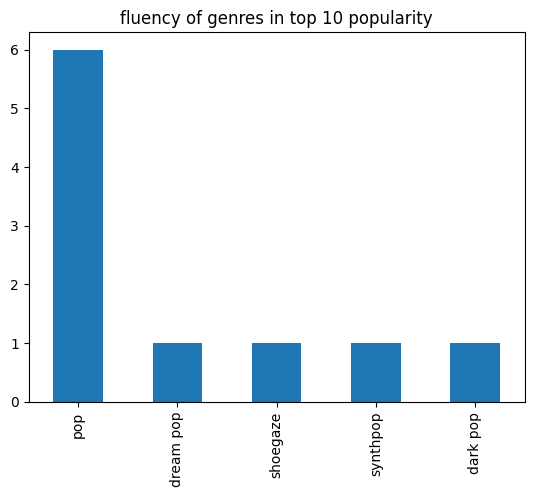

In [30]:
#let's graph a bar chart to get the insight
top_10_popularity = (song_df
    .sort_values('popularity', ascending = False)
    .head(10)
    ['genres']
    .explode('genres')
    .reset_index(drop = True)
)
(top_10_popularity
    .value_counts()
    .plot.bar(
        title = 'fluency of genres in top 10 popularity'
    )    
)

**The chart reveals that:**
- pop is still and always the core genres in Taylor's music, so it's currently her fans' most favorite genres in her music, including synthpop and dreampop.
- Taylor's listeners are turning to listen her songs having electronic and electronic pop music.

**How Taylor Swift song style change through the time? How it change with popularity?**

In [31]:
#change release_date 
song_df = song_df.assign(
    release_date = song_df['release_date'].dt.strftime("%Y-%m"),
)

(<Figure size 800x500 with 11 Axes>,
 [<AxesSubplot: >,
  <AxesSubplot: >,
  <AxesSubplot: >,
  <AxesSubplot: >,
  <AxesSubplot: >,
  <AxesSubplot: >,
  <AxesSubplot: >,
  <AxesSubplot: >,
  <AxesSubplot: >,
  <AxesSubplot: >,
  <AxesSubplot: title={'center': 'Trend of song features through time'}>])

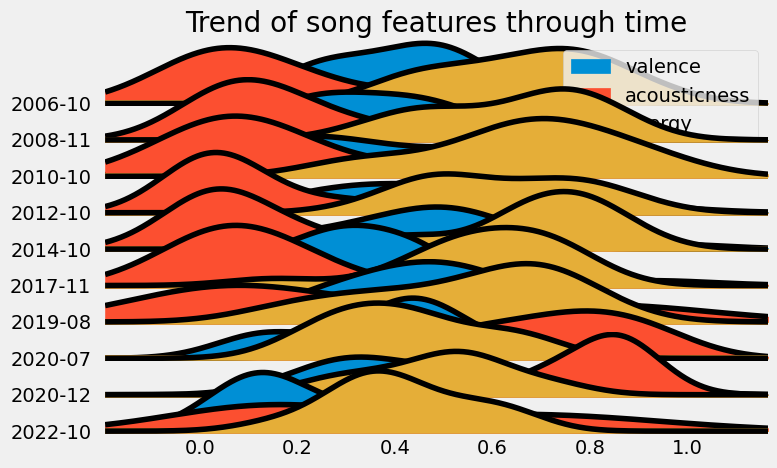

In [32]:
#Plot ridgeline of each feature in each album to show the trend of song feature through albums
plt.style.use("fivethirtyeight")
joypy.joyplot(song_df,
                column=['valence', 'acousticness', 'energy'], 
                by='release_date', 
                ylim='own',  
                figsize=(8,5), 
                legend=True,
                title = 'Trend of song features through time'
                )


[Text(0.5, 1.0, 'popularity statistics in albums with release_date order')]

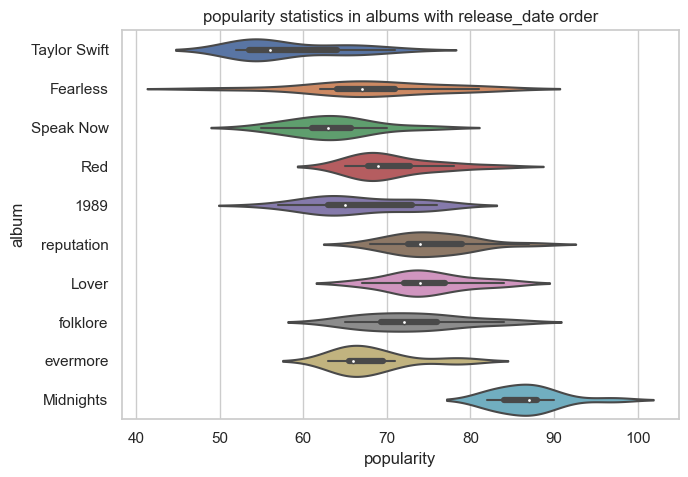

In [33]:
#We use violin plot to indecate the popularity statistics of each album
sns.set(style="whitegrid")

sns.violinplot(x ="popularity",
             y ="album",
             order = ['Taylor Swift', 'Fearless', 'Speak Now', 'Red', '1989', 'reputation', 'Lover', 'folklore', 'evermore', 'Midnights'],
             data = song_df
    ).set(title='popularity statistics in albums with release_date order')

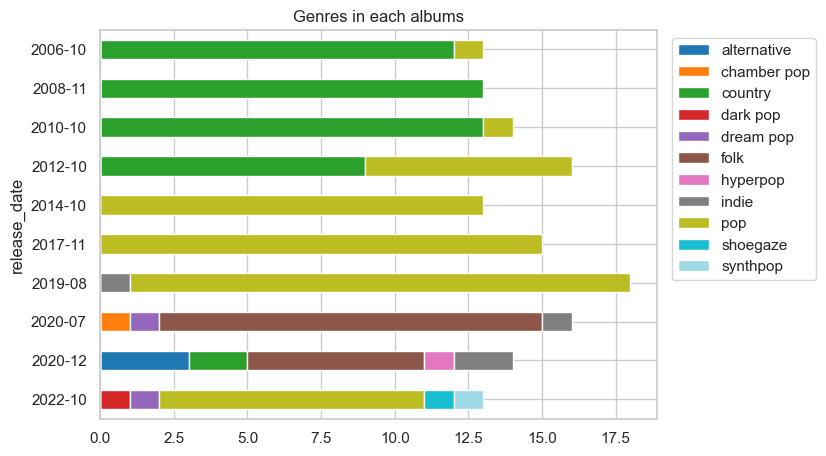

In [34]:
#use stacked bar chart to show genres distribution of each album
test_table = song_df[['release_date','album','genres']].explode('genres')

test_table.pivot_table(
    index = 'release_date',
    columns = 'genres',
    values = 'genres',
    aggfunc = 'count').sort_index(ascending = False).fillna(0).plot.barh(title = 'Genres in each albums',
                                                                        stacked=True,
                                                                        legend = True, 
                                                                        cmap = 'tab20').legend(bbox_to_anchor=(1.3,1))